In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches # for rectangle
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score # for r²

%matplotlib inline  

#setting global plot font, size etc
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('xtick.major', size=8,)
plt.rc('ytick.major', size=8,)
#plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.labelsize"] =12
plt.rcParams["legend.fontsize"] = 12

In [2]:
# import result data -  deep source
dfdw1= pd.read_csv("d_w_sw_1.csv")
dfdw2= pd.read_csv("d_w_sw_2.csv")
dfdw3= pd.read_csv("d_w_sw_3.csv")
dfdw4= pd.read_csv("d_w_sw_4.csv")
dfdw5= pd.read_csv("d_w_sw_5.csv")

dfdx1= pd.read_csv("d_x_sw_1.csv")
dfdx5= pd.read_csv("d_x_sw_5.csv")

In [3]:
# import result data -  narrow source
dfnt1= pd.read_csv("n_w_st_1.csv")
dfnt2= pd.read_csv("n_w_st_2.csv")
dfnt3= pd.read_csv("n_w_st_3.csv")
dfnt4= pd.read_csv("n_w_st_4.csv")
dfnt5= pd.read_csv("n_w_st_5.csv")

dfnx1= pd.read_csv("n_x_st_1.csv")
dfnx5= pd.read_csv("n_x_st_5.csv")

In [4]:
# prepare data for deep source

dfdw= [dfdw1, dfdw2, dfdw3, dfdw4, dfdw5]
dfdw = pd.concat(dfdw, ignore_index= True)  # merge the dataset
dfdw_f= dfdw.sort_values("St_Sw") # sort dats ascending order St_Sw

# prepare data for narrow source

dfnw= [dfnt1, dfnt2, dfnt3, dfnt4, dfnt5]
dfnw = pd.concat(dfnw, ignore_index= True)  # merge the dataset
dfnw_f= dfnw.sort_values("Sw_St") # sort dats ascending order St_Sw


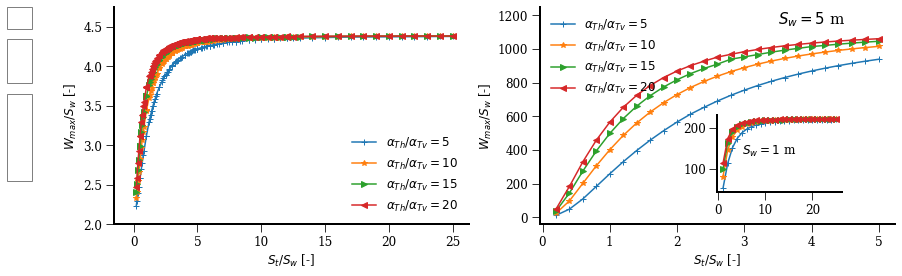

In [5]:
# Fig 3

fig, axs = plt.subplots(1, 2, figsize=(14,4)) # create 2 plots as 1x2
plt.subplots_adjust(hspace= 0.5)
legend =[r"$\alpha_{Th}/\alpha_{Tv} = 5$", r"$\alpha_{Th}/\alpha_{Tv} = 10$", 
         r"$\alpha_{Th}/\alpha_{Tv} = 15$", r"$\alpha_{Th}/\alpha_{Tv} = 20$"]

# creating scenario shapes
rect1 = patches.Rectangle((-0.3,0.9),width=0.07, height=0.1,linewidth=1,edgecolor='grey',
                         facecolor='none', transform=axs[0].transAxes, clip_on=False)
rect2 = patches.Rectangle((-0.3,0.65),width=0.07, height=0.2,linewidth=1,edgecolor='grey',
                         facecolor='none', transform=axs[0].transAxes, clip_on=False)
rect3 = patches.Rectangle((-0.3,0.2),width=0.07, height=0.4,linewidth=1,edgecolor='grey',
                         facecolor='none', transform=axs[0].transAxes, clip_on=False)

# add rect.
axs[0].add_patch(rect1)
axs[0].add_patch(rect2)
axs[0].add_patch(rect3)

axs[0].plot(dfdw_f["St_Sw"], dfdw_f["Dr_5_Wmax_Sw"], '+-', dfdw_f["St_Sw"], dfdw_f["Dr_10_Wmax_Sw"], '*-', dfdw_f["St_Sw"], dfdw_f["Dr_15_Wmax_Sw"], '>-', dfdw_f["St_Sw"], dfdw_f["Dr_20_Wmax_Sw"], '<-');
axs[0].set_ylim(2, 4.75)

axs[0].legend(legend, frameon=False, loc=4)
axs[0].set_xlabel(r"$S_t/S_w$ [-]"); axs[0].set_ylabel(r"$W_{max}/S_w$ [-]");

axs[1].plot(dfdx5["St_Sw"], dfdx5["Dr_5_Xmax_Sw"], '+-', dfdx5["St_Sw"], dfdx5["Dr_10_Xmax_Sw"], '*-', dfdx5["St_Sw"], dfdx5["Dr_15_Xmax_Sw"], '>-', dfdx5["St_Sw"], dfdx5["Dr_20_Xmax_Sw"], '<-');
axs[1].set_ylim(None, 1250)
axs[1].legend(legend, frameon=False, loc=2)
axs[1].text(3.5, 1150, r"$S_w = 5$ m", fontsize= 15)
axs[1].set_xlabel(r"$S_t/S_w$ [-]"); axs[1].set_ylabel(r"$W_{max}/S_w$ [-]");

ins1 = axs[1].inset_axes([0.5, 0.15, 0.35, 0.35]) # [left, bottom, width, height]
ins1.plot(dfdx1["St_Sw"], dfdx1["Dr_5_Xmax_Sw"], '+-', dfdx1["St_Sw"], dfdx1["Dr_10_Xmax_Sw"], '*-', dfdx1["St_Sw"], dfdx1["Dr_15_Xmax_Sw"], '>-', dfdx1["St_Sw"], dfdx1["Dr_20_Xmax_Sw"], '<-')
#ins2.set_xlabel(r"$S_{t}$", )
#ins2.set_ylabel(r"$W_{max}$ (m)", )
ins1.text(5, 135, r"$S_w = 1$ m", fontsize= 12);

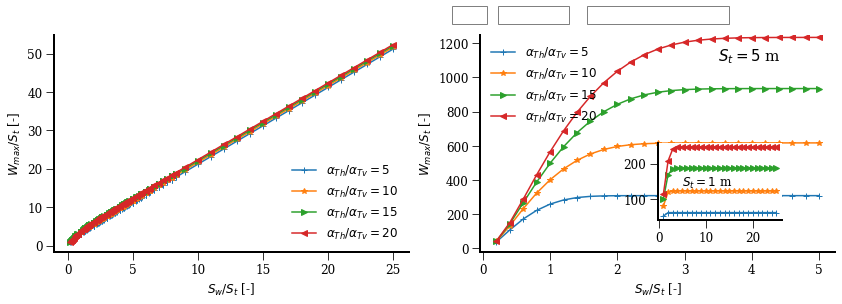

In [6]:
# Fig 4

fig, axs = plt.subplots(1, 2, figsize=(14,4)) # create 2 plots as 1x2
plt.subplots_adjust(hspace= 0.5)
legend =[r"$\alpha_{Th}/\alpha_{Tv} = 5$", r"$\alpha_{Th}/\alpha_{Tv} = 10$", 
         r"$\alpha_{Th}/\alpha_{Tv} = 15$", r"$\alpha_{Th}/\alpha_{Tv} = 20$"]

#horizontal scenario
rect4 = patches.Rectangle((1.12, 1.05),width=0.1, height=0.08,linewidth=1,edgecolor='grey',
                        facecolor='none', transform=axs[0].transAxes, clip_on=False)
rect5 = patches.Rectangle((1.25, 1.05),width=0.2, height=0.08,linewidth=1,edgecolor='grey',
                        facecolor='none', transform=axs[0].transAxes, clip_on=False)
rect6 = patches.Rectangle((1.50,1.05),width=0.4, height=0.08,linewidth=1,edgecolor='grey',
                        facecolor='none', transform=axs[0].transAxes, clip_on=False)

axs[1].add_patch(rect4)
axs[1].add_patch(rect5)
axs[1].add_patch(rect6)

axs[0].plot(dfnw_f["Sw_St"], dfnw_f["Dr_5_Wmax_St"], '+-', dfnw_f["Sw_St"], dfnw_f["Dr_10_Wmax_St"], '*-', dfnw_f["Sw_St"], dfnw_f["Dr_15_Wmax_St"], '>-', dfnw_f["Sw_St"], dfnw_f["Dr_20_Wmax_St"], '<-');
#axs[0].set_ylim(2, 4.75)

axs[0].legend(legend, frameon=False, loc=4)
axs[0].set_xlabel(r"$S_w/S_t$ [-]"); axs[0].set_ylabel(r"$W_{max}/S_t$ [-]");

axs[1].plot(dfnx5["Sw_St"], dfnx5["Dr_5_Xmax_St"], '+-', dfnx5["Sw_St"], dfnx5["Dr_10_Xmax_St"], '*-', dfnx5["Sw_St"], dfnx5["Dr_15_Xmax_St"], '>-', dfnx5["Sw_St"], dfnx5["Dr_20_Xmax_St"], '<-');
axs[1].set_ylim(None, 1250)
axs[1].legend(legend, frameon=False, loc=2)
axs[1].text(3.5, 1100, r"$S_t = 5$ m", fontsize= 15)
axs[1].set_xlabel(r"$S_w/S_t$ [-]"); axs[1].set_ylabel(r"$W_{max}/S_t$ [-]");

ins1 = axs[1].inset_axes([0.5, 0.15, 0.35, 0.35]) # [left, bottom, width, height]
ins1.plot(dfnx1["Sw_St"], dfnx1["Dr_5_Xmax_St"], '+-', dfnx1["Sw_St"], dfnx1["Dr_10_Xmax_St"], '*-', dfnx1["Sw_St"], dfnx1["Dr_15_Xmax_St"], '>-', dfnx1["Sw_St"], dfnx1["Dr_20_Xmax_St"], '<-')
#ins2.set_xlabel(r"$S_{t}$", )
#ins2.set_ylabel(r"$W_{max}$ (m)", )
ins1.text(5, 135, r"$S_t = 1$ m", fontsize= 12);
